
# Analysis of the TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This will be an analysis of the TMDb movie dataset, I will start by data wrangling, then data cleaning and finally I will explore the data and come up with conclusions about them. I will try to answer the question of how a movie's budget and revenue affects it's average rating.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [171]:
df = pd.read_csv('tmdb-movies.csv')

In [172]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


There are many columns in the above cell that will not be needed for analysis such as 'id' and 'cast' that should be removed. Also the last two columns ending with _adj show the budget/revenue of the movie after inflation, meaning we dont need the other two columns for budget/revenue.

In [173]:
df.shape #returns the row and columns of the dataframe

(10866, 21)

The above cell shows that there are 10866 movie entries and 21 attributes

In [174]:
df.describe() #returns statstics about attributes

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Desribing the dataframe shows the minimum `runtime` is 0.0 which is not possible. It also shows that at least 50% of the movies have 0 values for the `budget` or `revenue`, this means a large portion of the data is missing, and it also means that the mean for `budget` and `revenue` is inaccurate this is a limitation to this dataset that I will try to work around when cleaning the data.

In [175]:
df.isnull().sum() #returns the count of null values in each attribute

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

This shows there are many columns with null values, but most of these columns will later be dropped as they will not be needed for the analysis. 
This also shows that there are no missing values in budget and revenue, but as was seen after using `df.describe()` there are actually many missing values in them that were stored as 0 instead of NaN.


### Data Cleaning, dropping and replacing values

In [176]:
#Droping columns from DF
df.drop(['id', 'imdb_id','budget','revenue', 'homepage','tagline',
         'keywords', 'overview', 'cast', 'production_companies'], axis=1, inplace=True)

`id`, `imdb_id`, `homepage`, `tagline`, `keywords` and `overview` were dropped as they dont have any relevant statistical meaning.
`budget` and `revenue` were dropped because the `budget_adj` and `revenue_adj` are adjugested for all costs to be in terms of 2010 inflation rate, this way all of the money has the same value regardless of the movie's release date. `production_companies` and `cast` were removed as they will not be needed for analysis.

In [177]:
df.head(2)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [178]:
df.isnull().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

These are the count of null values of the modified dataframe, the entries with null values will be dropped since they are few.

In [179]:
df.dropna(inplace=True) #drops rows with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   original_title  10801 non-null  object 
 2   director        10801 non-null  object 
 3   runtime         10801 non-null  int64  
 4   genres          10801 non-null  object 
 5   release_date    10801 non-null  object 
 6   vote_count      10801 non-null  int64  
 7   vote_average    10801 non-null  float64
 8   release_year    10801 non-null  int64  
 9   budget_adj      10801 non-null  float64
 10  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1012.6+ KB


after droping null values, now 0 values for runtime will be dropped.

In [180]:
df = df.loc[df['runtime']!=0] #Drops rows where the runtime is 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10773 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10773 non-null  float64
 1   original_title  10773 non-null  object 
 2   director        10773 non-null  object 
 3   runtime         10773 non-null  int64  
 4   genres          10773 non-null  object 
 5   release_date    10773 non-null  object 
 6   vote_count      10773 non-null  int64  
 7   vote_average    10773 non-null  float64
 8   release_year    10773 non-null  int64  
 9   budget_adj      10773 non-null  float64
 10  revenue_adj     10773 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1010.0+ KB


This leaves the last thing to clean, which is the 0 values for the budget and revenue, the biggest concern with them is that a large amount of the data have 0 values for one of or both of them. I will now try to analyse the data with 0 values to see how they can be cleaned.

for ease of typing and because the other budget and revenue columns were removed, `budget_adj` and `revenue_adj` will be renamed to remove `_adj`

In [181]:
#Renames budget_adj and revenue_adj columns to remove _adj
df.rename(axis=1, mapper={'budget_adj':'budget'}, inplace=True)
df.rename(axis=1, mapper={'revenue_adj':'revenue'}, inplace=True)
df.head(0)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue


In [182]:
#Shows count of entries where revenue or budget is 0
df[(df['revenue'] ==0) | (df['budget'] ==0)].shape[0]

6919

This show that there are almost 7000 entries with 0 for budget or revenue! Dropping this many entries is not a possibility, I see that replacing the 0s with null values as the best solution to this limitation.

In [183]:
#Replacing 0 with NaN
df['revenue'] = df['revenue'].replace(0.0, np.nan)
df['budget'] = df['budget'].replace(0.0, np.nan)
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10773.000000,10773.000000,10773.000000,10773.000000,10773.000000,5.162000e+03,4.849000e+03
mean,0.650638,102.454377,219.104335,5.972199,2001.266314,3.694008e+07,1.150988e+08
std,1.003273,30.377912,577.800253,0.932880,12.825013,4.196832e+07,1.988568e+08
min,0.000188,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210018,90.000000,17.000000,5.400000,1995.000000,8.131203e+06,1.046155e+07
50%,0.386180,99.000000,39.000000,6.000000,2006.000000,2.278753e+07,4.395666e+07
75%,0.718864,112.000000,147.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Describe no longer shows `budget` and `revenue` minimum values as 0 and now the rest of the statistics such as the mean are more accurate

<a id='eda'></a>
## Exploratory Data Analysis


### How does budget and revenue affect the rating of a movie

Before starting I will make some functions that will be used for plotting.

In [184]:
#Function makes strings more appropriate for visualization in plots
def plot_title(str):
    return str.replace('_',' ').title()

In [185]:
#Function plots dataframe in a barplot given x and y 
def bar_plot(df,x,y):
    title_x, title_y = plot_title(x), plot_title(y)
    
    df.groupby(x)[y].mean().plot(kind='bar', title='{} Compared to Average {}'.format(title_x,title_y))
    plt.xlabel(title_x, fontsize=15)
    plt.ylabel(title_y, fontsize=15)

I will now plot the average rating to see how many movies are in each rating, it will plotted using a histograph to show the total count in the ratings.

Text(0, 0.5, 'Count')

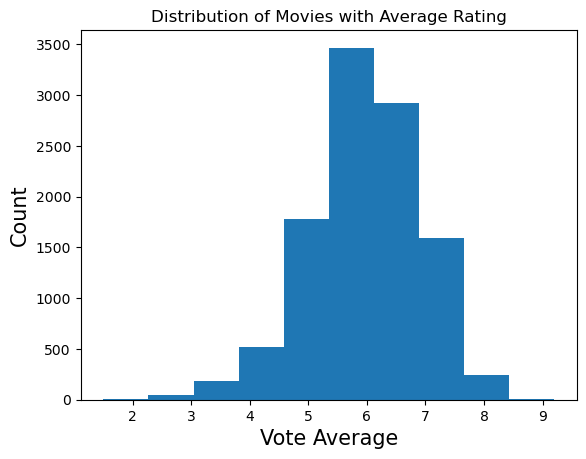

In [186]:
vote_hist = plt.hist(df['vote_average'])
plt.title('Distribution of Movies with Average Rating')
plt.xlabel('Vote Average', fontsize=15)
plt.ylabel('Count', fontsize=15)

From this chart we can see that the majority of movies have an average rating between around 4 and 7.5, with a very small number of movies outside that range

Now I will explore how the budget of a movie affects its rating, could a higher budget mean a movie with a higher rating?

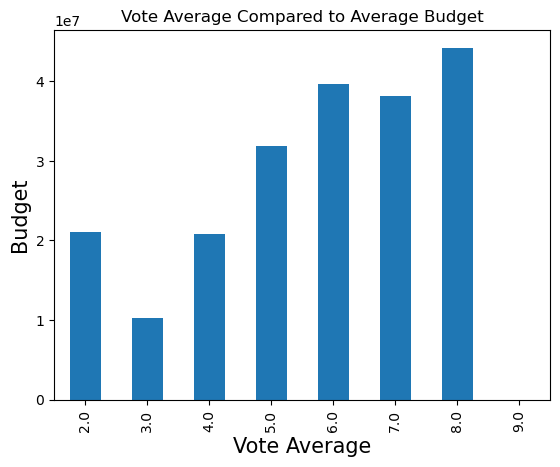

In [187]:
#Rounds vote_average to the nearest integer to make it possible to use in bar graphs
dfRoundedRating=df.round({'vote_average':0})

bar_plot(dfRoundedRating,'vote_average','budget') 

This shows that there is a small positive correlation between budget and revenue, the graph start at an average budget of 20,000,000 for movies with a rating of two but dips down to half that budget for movies with a rating of 3, and then it start going up until the average ratings of 6 to 8 where there really isnt much of a difference between them and their budgets. This makes sense as the more money you put into a movie the more likely it will succeed, but also putting money into a bad movie wont make it better.

### How does the average rating compare to the revenue? Do movies that make more money get a better rating?

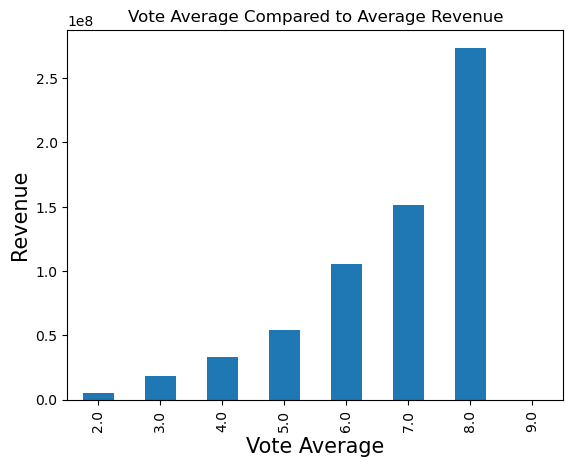

In [188]:
bar_plot(dfRoundedRating,'vote_average','revenue')

With this bar graph you can see that as the rating increases the revenue greatly increases as well, this also sense because if people rate a movie well and think its good people will see the good ratings and be more inclined to see the movie.

Since revenue and vote average seem to be correlated I will expand on them further, I will look at how shorter or longer movies are affected in the same comparison. Movies of a length of 120 minutes or longer will be considered as long movies and movies less than 120 minutes will be considered short movies.

In [189]:
#DF of movies whose runtime is 120 minutes or greater
df_long = dfRoundedRating[dfRoundedRating['runtime']>=120]
df_long.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.0,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.0,2015,1.379999e+08,3.481613e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,8.0,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.0,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.0,2015,1.241999e+08,4.903142e+08


In [190]:
#DF of movies whose runtime is less than 120 minutes
df_short = dfRoundedRating[dfRoundedRating['runtime']<120]
df_short.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget,revenue
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.0,2015,1.012000e+08,2.716190e+08
8,7.404165,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.0,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Pete Docter,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
12,6.118847,Ex Machina,Alex Garland,108,Drama|Science Fiction,1/21/15,2854,8.0,2015,1.379999e+07,3.391985e+07
13,5.984995,Pixels,Chris Columbus,105,Action|Comedy|Science Fiction,7/16/15,1575,6.0,2015,8.095996e+07,2.241460e+08


In [191]:
# mean of long and short df
df_long_mean = df_long.groupby('vote_average')['revenue'].mean()
df_short_mean = df_short.groupby('vote_average')['revenue'].mean()
# need to see if x axis is the same so to be able to plot
print(df_long_mean)
print(df_short_mean)

vote_average
4.0    1.389265e+08
5.0    9.134726e+07
6.0    1.817645e+08
7.0    2.256401e+08
8.0    3.765229e+08
9.0             NaN
Name: revenue, dtype: float64
vote_average
2.0    5.293108e+06
3.0    1.863346e+07
4.0    2.961349e+07
5.0    5.152778e+07
6.0    8.839476e+07
7.0    1.116449e+08
8.0    1.680184e+08
9.0             NaN
Name: revenue, dtype: float64


Short and long mean x axis is not the same because long mean has no values for 2.0 and 3.0 ratings, to be able to plot we need to add zero values for those ratings

In [192]:
# zero values for 2.0 and 3.0
zeros = pd.Series([0,0],[2.0,3.0])
# concats 0 values to the start of long_mean
df_long_mean = pd.concat([zeros,df_long_mean])
print(df_long_mean)

2.0    0.000000e+00
3.0    0.000000e+00
4.0    1.389265e+08
5.0    9.134726e+07
6.0    1.817645e+08
7.0    2.256401e+08
8.0    3.765229e+08
9.0             NaN
dtype: float64


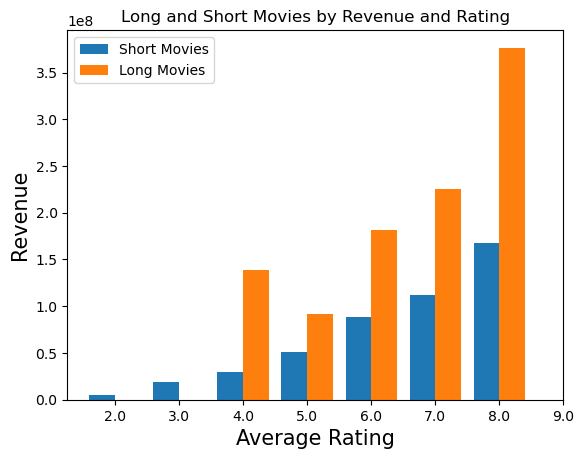

In [193]:
#location of each rating group and width of each bar
ind = np.arange(len(df_short_mean))
width = 0.4

#plot bars
short_bars = plt.bar(ind, df_short_mean, width, label='Short Movies')
long_bars = plt.bar(ind+width, df_long_mean, width, label='Long Movies')

# title, labels and legend
plt.ylabel('Revenue', fontsize=15)
plt.xlabel('Average Rating', fontsize=15)
plt.title('Long and Short Movies by Revenue and Rating')
locations = ind + width / 2  # xtick locations
labels = ['2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0']  # xtick labels
plt.xticks(locations, labels)
plt.legend();

With this plot we can see that longer movies make considerably more money than shorter movies, we can also see that there are no long movies in the 3.0 or lower groups.

The first three plots were single-variable plots, the first graphed the distribution of movies with average rating and it was shown that the majority of movies were rated between 4 and 7.5. The second plot graphed the average rating with the budget. The third plot graphed the average rating with revenue and showed that a high average greatly increases revenue, this alongside the fact that was shown in the first graph, that there is a small number of movies above a rating of 7.5 makes sense; if it is rare for a movie to get a good rating, when it does, many more people will go see the movie and it will make more money. 
The last graph which was a multi-variable plotted long and short movies by revenue and rating, it was found that long movies of length 120 minutes or greater make considerably more money than shorter movies.

<a id='conclusions'></a>
## Conclusions
***

**Results**: 
1. There is a small positive correlation between budget and average rating.
2. There is a positive correlation between revenue and average rating, as the rating increases the revenue greatly increases.
3. Long films of a runtime of 120 minutes or greater on average earn much more money than shorter films of a runtime of less than 120 minutes.


**Limitations**: 
1. The majority of the movies had missing values for either budget or revenue, this means over half the data is not graphed in the plots because it doesnt exist, reducing the size of the dataset to half.
2. To plot using bar plots Average rating had to be rouneded to the nearest integer, this could make the plots slightly misleading as a 3.5 would be plotted under 4.0.
